In [101]:
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model


In [102]:
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "boston_housing.data"

## VariablesThere are 14 attributes in each case of the dataset. 

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's


df = pd.read_csv(path)

In [103]:
#Fetch the data value by the line
fd = pd.read_csv(path, header=None)
data = np.ones((len(fd), 14))
for i, d in enumerate(fd.values):
    d = list(map(float, filter(lambda s:s!='' ,d[0].split(' '))))
    data[i] = d



In [104]:
X, y = np.split(data, (13,), axis=1)
y = y.ravel() 


## Split data

In [105]:
from sklearn import datasets, linear_model

In [148]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

## Normalization

In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [150]:
ss_x = StandardScaler()
ss_y = StandardScaler()

In [151]:
ss_X_train = ss_x.fit_transform(X_train)
ss_X_test = ss_x.transform(X_test)

In [159]:
ss_y_train = ss_y.fit_transform(y_train.reshape(-1,1))
ss_y_test = ss_y.transform(y_test.reshape(-1,1))

## LinearRegression fit

In [160]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(ss_X_train,ss_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
print (linreg.intercept_)
print (linreg.coef_)

[  2.41506235e-15]
[[-0.12026411  0.15044778  0.02951803  0.07470354 -0.28043353  0.22170939
   0.02190624 -0.35275513  0.29939558 -0.2028089  -0.23911894  0.06305081
  -0.45259462]]


In [162]:
y_pred = linreg.predict(X_test)

In [163]:
from sklearn.model_selection import cross_val_predict

In [164]:
predicted = cross_val_predict(linreg,X,y,cv=10)

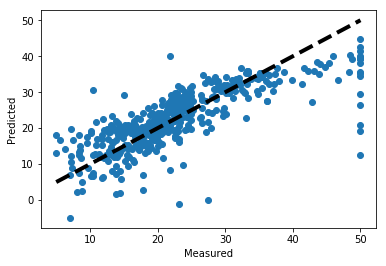

In [165]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()